In [1]:
!pip install google-cloud
!pip install google-cloud-bigquery[pandas]
!pip install google-cloud-storage

In [2]:
!pip install --upgrade google-cloud-bigquery[bqstorage,pandas]

Requirement already up-to-date: google-cloud-bigquery[bqstorage,pandas] in g:\anaconda\lib\site-packages (3.3.2)


In [3]:
%load_ext google.cloud.bigquery

In [4]:
#Set environment variables for your notebook
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "G:\\Scaler Academy\\Case Studies\\Target SQL Case Study\\target-sql-360713-577b5de649ac.json"
#Imports google cloud client library and initiates BQ service
from google.cloud import bigquery
bigquery_client = bigquery.Client()

In [5]:
customers= bigquery_client.query("""
select
 * from Target.customers
;
""").to_dataframe()

In [6]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0735e7e4298a2ebbb46649346570476a,fcb003b1bdc0df64b4d065d9bb94f8c4,59650,acu,RN
1,903b3d86e3990db01619a4ebe3edef4e,46824822b15da44e983b021d0e945379,59650,acu,RN
2,38c97666e962d4fea7fd6a83e69f20cd,b6108acc674ae5c99e29adc1047d1049,59650,acu,RN
3,77c2f46cf580f4874c9a5751c2d88474,402cce5c0509000eed9e77fece8056e2,63430,ico,CE
4,4d3ef4cfffb8ad4767c199c36a4cfee6,6ba00666ab7eada5ceec279b259e44b5,63430,ico,CE
...,...,...,...,...,...
99436,0cba07be7f89557dbdf43a0e58663ff9,314e67684fb54502d819d66c0e3beb9b,25780,sao jose do vale do rio preto,RJ
99437,38efc316910029abb94b32e27de7bd11,c76f390a72ba18ccac9e4ae30a25b188,25780,sao jose do vale do rio preto,RJ
99438,bbc245da02e51a5ff7b595c31628af6b,9022903214ece785db32637ebda2f605,25780,sao jose do vale do rio preto,RJ
99439,724a8db62950dcbfcbec9be37795ba1c,9bc1d14c71ab8184a43e64cfeb070d33,25780,sao jose do vale do rio preto,RJ


In [7]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Action Items:
1.	Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset
    1.	Data type of columns in a table
    2.	Time period for which the data is given
    3.	Cities and States covered in the dataset
2.	In-depth Exploration:
    1.	Is there a growing trend on e-commerce in Brazil? How can we describe a complete scenario? Can we see some seasonality with peaks at specific months?
    2.	What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night)?
3.	Evolution of E-commerce orders in the Brazil region:
    1.	Get month on month orders by region, states
    2.	How are customers distributed in Brazil
4.	Impact on Economy: Analyze the money movemented by e-commerce by looking at order prices, freight and others.
    1.	Get % increase in cost of orders from 2017 to 2018 (include months between Jan to Aug only)
    2.	Mean & Sum of price and freight value by customer state
5.	Analysis on sales, freight and delivery time
    1.	Calculate days between purchasing, delivering and estimated delivery
    2.	Create columns:
        	time_to_delivery = order_purchase_timestamp-order_delivered_customer_date
        	diff_estimated_delivery = order_estimated_delivery_date-order_delivered_customer_date
    3.	Group data by state, take mean of freight_value, time_to_delivery, diff_estimated_delivery
    4.	Sort the data to get the following:
        1.	Top 5 states with highest/lowest average freight value - sort in desc/asc limit 5
        2.	Top 5 states with highest/lowest average time to delivery
        3.	Top 5 states where delivery is really fast/ not so fast compared to estimated date
6.	Payment type analysis:
    1.	Month over Month count of orders for different payment types
    2.	Distribution of payment installments and count of orders


#### Data types of Columns of different tables

In [ ]:
##Customers

In [8]:
bigquery_client.query("""
SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
   target-sql-360713.Target.INFORMATION_SCHEMA.COLUMNS
  WHERE
    table_name = 'customers';
""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type
0,Target,customers,customer_id,YES,STRING
1,Target,customers,customer_unique_id,YES,STRING
2,Target,customers,customer_zip_code_prefix,YES,INT64
3,Target,customers,customer_city,YES,STRING
4,Target,customers,customer_state,YES,STRING


We have 4 string columns and 1 is a numeric column

In [ ]:
##geolocation

In [9]:
bigquery_client.query("""
SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
   target-sql-360713.Target.INFORMATION_SCHEMA.COLUMNS
  WHERE
    table_name = 'geolocation';
""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type
0,Target,geolocation,geolocation_zip_code_prefix,YES,INT64
1,Target,geolocation,geolocation_lat,YES,FLOAT64
2,Target,geolocation,geolocation_lng,YES,FLOAT64
3,Target,geolocation,geolocation_city,YES,STRING
4,Target,geolocation,geolocation_state,YES,STRING


In [ ]:
##order_items

In [10]:
bigquery_client.query("""
SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
   target-sql-360713.Target.INFORMATION_SCHEMA.COLUMNS
  WHERE
    table_name = 'order_items';
""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type
0,Target,order_items,order_id,YES,STRING
1,Target,order_items,order_item_id,YES,INT64
2,Target,order_items,product_id,YES,STRING
3,Target,order_items,seller_id,YES,STRING
4,Target,order_items,shipping_limit_date,YES,TIMESTAMP
5,Target,order_items,price,YES,FLOAT64
6,Target,order_items,freight_value,YES,FLOAT64


In the Order_items we have a mix of string and numerical columns with a TIMESTAMP column (shipping_limit_date)

In [93]:
bigquery_client.query("""
SELECT
    count(distinct order_id) as Num_of_Orders, count(distinct product_id) as Num_of_Products, 
    count(distinct seller_id) as Num_of_sellers 
    from Target.order_items
""").to_dataframe()

,Num_of_Orders,Num_of_Products,Num_of_sellers
0,98666,32951,3095


From the above result we can see that, there are 98666 orders consisting of 32951 products by 3095 sellers.

In [ ]:
##Payments

In [11]:
bigquery_client.query("""
SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
   target-sql-360713.Target.INFORMATION_SCHEMA.COLUMNS
  WHERE
    table_name = 'payments';
""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type
0,Target,payments,order_id,YES,STRING
1,Target,payments,payment_sequential,YES,INT64
2,Target,payments,payment_type,YES,STRING
3,Target,payments,payment_installments,YES,INT64
4,Target,payments,payment_value,YES,FLOAT64


In the payments table, we have 3 numerical and 2 string data types which are order_id and Payment_type

In [ ]:
## order_reviews

In [12]:
bigquery_client.query("""
SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
   target-sql-360713.Target.INFORMATION_SCHEMA.COLUMNS
  WHERE
    table_name = 'order_reviews';
""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type
0,Target,order_reviews,review_id,YES,STRING
1,Target,order_reviews,order_id,YES,STRING
2,Target,order_reviews,review_score,YES,INT64
3,Target,order_reviews,review_comment_title,YES,STRING
4,Target,order_reviews,review_creation_date,YES,TIMESTAMP
5,Target,order_reviews,review_answer_timestamp,YES,TIMESTAMP


In [94]:
bigquery_client.query("""
SELECT distinct review_score as Review_scores
    from Target.order_reviews
""").to_dataframe()

,Review_scores
0,1
1,2
2,3
3,4
4,5


We can see that reviews are giving on scale of 1-5 in this data.

In [ ]:
## Orders

In [13]:
bigquery_client.query("""
SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
   target-sql-360713.Target.INFORMATION_SCHEMA.COLUMNS
  WHERE
    table_name = 'orders';
""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type
0,Target,orders,order_id,YES,STRING
1,Target,orders,customer_id,YES,STRING
2,Target,orders,order_status,YES,STRING
3,Target,orders,order_purchase_timestamp,YES,TIMESTAMP
4,Target,orders,order_approved_at,YES,TIMESTAMP
5,Target,orders,order_delivered_carrier_date,YES,TIMESTAMP
6,Target,orders,order_delivered_customer_date,YES,TIMESTAMP
7,Target,orders,order_estimated_delivery_date,YES,TIMESTAMP


This table has as many as 5 TIMESTAMP columns like delvery date (customer and carrier), estimated delivery date,Purchase date
and also 3 string columns

In [ ]:
##products

In [14]:
bigquery_client.query("""
SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
   target-sql-360713.Target.INFORMATION_SCHEMA.COLUMNS
  WHERE
    table_name = 'products';
""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type
0,Target,products,product_id,YES,STRING
1,Target,products,product_category,YES,STRING
2,Target,products,product_name_length,YES,INT64
3,Target,products,product_description_length,YES,INT64
4,Target,products,product_photos_qty,YES,INT64
5,Target,products,product_weight_g,YES,INT64
6,Target,products,product_length_cm,YES,INT64
7,Target,products,product_height_cm,YES,INT64
8,Target,products,product_width_cm,YES,INT64


In [95]:
bigquery_client.query("""
SELECT count(distinct product_id) as Num_of_products
    from Target.products
""").to_dataframe()

,Num_of_products
0,32951


In [ ]:
## sellers

In [15]:
bigquery_client.query("""
SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
   target-sql-360713.Target.INFORMATION_SCHEMA.COLUMNS
  WHERE
    table_name = 'sellers';
""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type
0,Target,sellers,seller_id,YES,STRING
1,Target,sellers,seller_zip_code_prefix,YES,INT64
2,Target,sellers,seller_city,YES,STRING
3,Target,sellers,seller_state,YES,STRING


In [96]:
bigquery_client.query("""
SELECT count(distinct seller_id) as Num_of_sellers
    from Target.sellers
""").to_dataframe()

,Num_of_sellers
0,3095


### Time range of data:

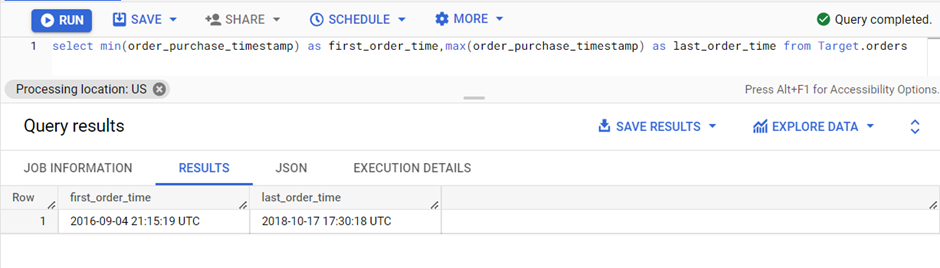

From the orders table, we can observe that the orders range from **September 2016** to **October 2018**

### Cities and States:

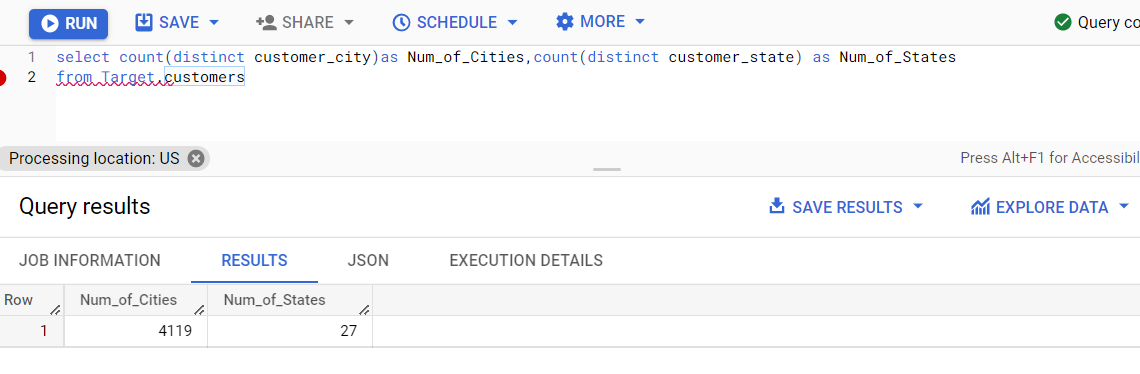

There are total of 4119 cities spread across 27 states in the dataset

### To Analyze pattern in the sales (value and count)
From the order_items first calculating total order value per order 

In [16]:
bigquery_client.query("""
with order_items_total as 
(select order_id, sum(price+freight_value) as Total_per_order
from Target.order_items
group by order_id
order by order_id)

select * from order_items_total
""").to_dataframe()

,order_id,Total_per_order
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,343.40
98662,fffcd46ef2263f404302a634eb57f7eb,386.53
98663,fffce4705a9662cd70adb13d4a31832d,116.85
98664,fffe18544ffabc95dfada21779c9644f,64.71


In [98]:
## Then joining this order total with the orders table to get order value against order_id
## Month and Year 
bigquery_client.query("""
with order_items_total as 
(select order_id, sum(price+freight_value) as Total_per_order
from Target.order_items
group by order_id)


select extract(YEAR from order_purchase_timestamp) as Year,extract(MONTH from order_purchase_timestamp) as Month,
count(o.order_id) as Num_of_Orders ,avg(Total_per_order) as Average_Purchases from Target.orders o left join
order_items_total ot on 
o.order_id = ot.order_id
group by year,month
order by year,month

""").to_dataframe()

,Year,Month,Num_of_Orders,Average_Purchases
0,2016,9,4,118.250000
1,2016,10,324,184.444286
2,2016,12,1,19.620000
3,2017,1,800,173.876413
4,2017,2,1780,165.193664
5,2017,3,2682,163.592802
6,2017,4,2404,172.489435
7,2017,5,3700,160.161462
8,2017,6,3245,156.345365
9,2017,7,4026,147.385140


We can oobserve that than 2017 there is obviously an increasing trend in 2018 as in every month the count of orders are more than that of 2017.<br>
2017 Seems to peak at November, which is close to 30% more than number of orders in any other month of 2017.

In [99]:
## Hourly
bigquery_client.query("""
with order_items_total as 
(select order_id, sum(price+freight_value) as Total_per_order
from Target.order_items
group by order_id)

select extract(HOUR from order_purchase_timestamp) as Hour,count(o.order_id) as Num_of_Orders,avg(Total_per_order) as Average_Purchases
from Target.orders o left join order_items_total ot on 
o.order_id = ot.order_id
group by Hour
order by Hour

""").to_dataframe()

,Hour,Num_of_Orders,Average_Purchases
0,0,2394,156.021405
1,1,1170,150.933391
2,2,510,129.754574
3,3,272,153.605539
4,4,206,138.215024
5,5,188,139.974492
6,6,502,134.904900
7,7,1231,146.984342
8,8,2967,155.670458
9,9,4785,166.895989


It appears that the less busy hours for purchasing is between 12:00 AM and 6:00 AM, <br>
orders start to increase from 7:00 AM with peak hours being 10:00 Am to 4:00 PM <br>
There Peak hours can we considered Morning and Afternoon (till early evenings 4-5 PM)

### 3.Evolution of E-commerce orders in the Brazil region:

#### Get month on month orders by region, states

In [ ]:
### This can be solved by joins as well, but using CTE just to understand them and to make it simpler

In [19]:
bigquery_client.query("""
with order_items_total as 
(select order_id, sum(price+freight_value) as Total_per_order
from Target.order_items
group by order_id),

order_plus_prices_state_City as 
(select o.order_id,o.customer_id,order_purchase_timestamp,extract(YEAR from order_purchase_timestamp) as Year,
extract(MONTH from order_purchase_timestamp) as Month,Total_per_order,customer_city as City, customer_state as State from Target.orders o 
left join order_items_total ot on 
o.order_id = ot.order_id
left join Target.customers c on 
o.customer_id=c.customer_id)

select Year,Month,City,State,count(order_id) as Num_of_Orders, avg(Total_per_order) as Average_Purchases from order_plus_prices_state_City
group by year,month,City,State
order by year,month,City,State

""").to_dataframe()

,Year,Month,City,State,Num_of_Orders,Average_Purchases
0,2016,9,boa vista,RR,1,136.23
1,2016,9,passo fundo,RS,1,75.06
2,2016,9,sao joaquim da barra,SP,1,143.46
3,2016,9,sao jose dos campos,SP,1,NaN
4,2016,10,alem paraiba,MG,1,89.38
...,...,...,...,...,...,...
21693,2018,9,taubate,SP,1,NaN
21694,2018,10,picos,PI,1,NaN
21695,2018,10,pirai,RJ,1,NaN
21696,2018,10,registro,SP,1,NaN


#### Customer Distribution in Brazil

In [24]:
bigquery_client.query("""

with Orders_Customers as 
(select o.order_id,o.customer_id,order_purchase_timestamp,customer_city as City, customer_state as State from Target.orders o 
left join Target.customers c on 
o.customer_id=c.customer_id
where o.customer_id is not NULL)

select City,State,count(customer_id) as Num_of_Customers from Orders_Customers
group by City,State
order by count(customer_id) desc


""").to_dataframe()

,City,State,Num_of_Customers
0,sao paulo,SP,15540
1,rio de janeiro,RJ,6882
2,belo horizonte,MG,2773
3,brasilia,DF,2131
4,curitiba,PR,1521
...,...,...,...
4305,caetanos,BA,1
4306,jataizinho,PR,1
4307,sao domingos do sul,RS,1
4308,pirapemas,MA,1


In [102]:
customer_distri= bigquery_client.query("""

with Orders_Customers as 
(select o.order_id,o.customer_id,order_purchase_timestamp,customer_city as City, customer_state as State from Target.orders o 
left join Target.customers c on 
o.customer_id=c.customer_id)

select City,State,count(customer_id) as Num_of_Customers from Orders_Customers
group by City,State
having count(customer_id) > 10
order by count(customer_id) desc


""").to_dataframe()

In [104]:
customer_distri.shape[0]

870

Out of total 4310 cities, there are only 870 cities with more than 10 customers per city.<br>
Remaining 3500 cities have at most 10 customers <br>
with top 10 cities being the below:

In [111]:
customer_distri.head(10)

,City,State,Num_of_Customers
0,sao paulo,SP,15540
1,rio de janeiro,RJ,6882
2,belo horizonte,MG,2773
3,brasilia,DF,2131
4,curitiba,PR,1521
5,campinas,SP,1444
6,porto alegre,RS,1379
7,salvador,BA,1245
8,guarulhos,SP,1189
9,sao bernardo do campo,SP,938


### 4.1 Get % increase in cost of orders from 2017 to 2018 (include months between Jan to Aug only)

In [ ]:
## Taking into account Sum of sales 

In [45]:
bigquery_client.query("""

with order_items_total as 
(select order_id,sum(price) as Price, sum(price+freight_value) as Total_per_order
from Target.order_items
group by order_id),

JantoAug_2017_sum as 
(select extract(MONTH from order_purchase_timestamp) as Month_2017, sum(Price) as Price_2017,sum(Total_per_order) as PriceAndFreight_2017 from Target.orders o left join
order_items_total ot on 
o.order_id = ot.order_id
where extract(YEAR from order_purchase_timestamp) =2017
and extract(MONTH from order_purchase_timestamp) between 1 and 8
group by 1),

JantoAug_2018_sum as 
(select extract(MONTH from order_purchase_timestamp) as Month_2018, sum(Price) as Price_2018,sum(Total_per_order) as PriceAndFreight_2018 from Target.orders o left join
order_items_total ot on 
o.order_id = ot.order_id
where extract(YEAR from order_purchase_timestamp) =2018
and extract(MONTH from order_purchase_timestamp) between 1 and 8
group by 1)


select *, ((PriceAndFreight_2018-PriceAndFreight_2017)/(PriceAndFreight_2017))*100 as Percentage_change_Total,
((Price_2018-Price_2017)/(Price_2017))*100 as Percentage_change_Price
from JantoAug_2017_sum left join JantoAug_2018_sum
on JantoAug_2017_sum.Month_2017 = JantoAug_2018_sum.Month_2018
order by Month_2017


""").to_dataframe()

,Month_2017,Price_2017,PriceAndFreight_2017,Month_2018,Price_2018,PriceAndFreight_2018,Percentage_change_Total,Percentage_change_Price
0,1,120312.87,137188.49,1,950030.36,1107301.89,707.139061,689.633196
1,2,247303.02,286280.62,2,844178.71,986908.96,244.734813,241.353983
2,3,374344.30,432048.59,3,983213.44,1155126.82,167.360396,162.649502
3,4,359927.23,412422.24,4,996647.75,1159698.04,181.191926,176.902570
4,5,506071.14,586190.95,5,996517.68,1149781.82,96.144587,96.912568
5,6,433038.60,502963.04,6,865124.31,1022677.11,103.330469,99.779953
6,7,498031.48,584971.62,7,895507.22,1058728.03,80.987931,79.809361
7,8,573971.68,668204.60,8,854686.33,1003308.47,50.149890,48.907404


Between Jan to August the highest % increase occured in January with over 700% increase over 2017, <br>
for the remaining months on an average there was an increase around over 100% (on average)

In [ ]:
## Taking into account Average of sales 

In [47]:
bigquery_client.query("""

with order_items_total as 
(select order_id,sum(price) as Price, sum(price+freight_value) as Total_per_order
from Target.order_items
group by order_id),

JantoAug_2017_sum as 
(select extract(MONTH from order_purchase_timestamp) as Month_2017, avg(Price) as Price_2017, avg(Total_per_order) as PriceAndFreight_2017 from Target.orders o left join
order_items_total ot on 
o.order_id = ot.order_id
where extract(YEAR from order_purchase_timestamp) =2017
and extract(MONTH from order_purchase_timestamp) between 1 and 8
group by 1),

JantoAug_2018_sum as 
(select extract(MONTH from order_purchase_timestamp) as Month_2018, avg(Price) as Price_2018, avg(Total_per_order) as PriceAndFreight_2018 from Target.orders o left join
order_items_total ot on 
o.order_id = ot.order_id
where extract(YEAR from order_purchase_timestamp) =2018
and extract(MONTH from order_purchase_timestamp) between 1 and 8
group by 1)


select *, ((PriceAndFreight_2018-PriceAndFreight_2017)/(PriceAndFreight_2017))*100 as Percentage_change_Total,
((Price_2018-Price_2017)/(Price_2017))*100 as Percentage_change_Price
from JantoAug_2017_sum left join JantoAug_2018_sum
on JantoAug_2017_sum.Month_2017 = JantoAug_2018_sum.Month_2018
order by Month_2017


""").to_dataframe()

,Month_2017,Price_2017,PriceAndFreight_2017,Month_2018,Price_2018,PriceAndFreight_2018,Percentage_change_Total,Percentage_change_Price
0,1,152.487795,173.876413,1,131.583152,153.365913,-11.796022,-13.709059
1,2,142.702262,165.193664,2,126.109756,147.431873,-10.752102,-11.627360
2,3,141.743393,163.592802,3,136.785398,160.702117,-1.767000,-3.497867
3,4,150.534182,172.489435,4,143.733451,167.248059,-3.038665,-4.517732
4,5,138.270803,160.161462,5,145.413349,167.777881,4.755463,5.165621
5,6,134.609450,156.345365,6,140.442258,166.019011,6.187357,4.333134
6,7,125.480343,147.385140,7,142.755814,168.775391,14.513167,13.767472
7,8,133.699436,155.649802,8,132.468433,155.503483,-0.094005,-0.920724


By seeing the above result and comparing with previous one, we can say that: <br>
Though in terms of total Value there is growth from 2017 to 2018 <br>
Coming to Average value per order there can see a slight decline too (Though this did not translate to decrease total sales as total sales have risen)

### 4.2 Mean & Sum of price and freight value by customer state

In [85]:
bigquery_client.query("""

with order_items_total as 
(select order_id,sum(price) as Price, sum(price+freight_value) as PricePlusFreight
from Target.order_items
group by order_id),

order_plus_state as 
(select o.order_id, customer_state as State,Price,PricePlusFreight from Target.orders o 
left join order_items_total ot on 
o.order_id = ot.order_id
left join Target.customers c on 
o.customer_id=c.customer_id)


select State, sum(Price) as Sum_of_Price,Avg(Price) as Avg_of_Price,sum(PricePlusFreight) as Sum_of_Price_Freight,
avg(PricePlusFreight) as Avg_of_Price_Freight
from order_plus_state
group by State
order by State


""").to_dataframe().head(10)

,State,Sum_of_Price,Avg_of_Price,Sum_of_Price_Freight,Avg_of_Price_Freight
0,AC,15982.95,197.320370,19669.70,242.835802
1,AL,80314.81,195.413163,96229.40,234.134793
2,AM,22356.84,152.087347,27835.73,189.358707
3,AP,13474.30,198.151471,16262.80,239.158824
4,BA,511349.99,152.278139,611506.67,182.104428
5,CE,227254.71,171.254491,275606.30,207.691258
6,DF,302603.94,142.401854,353229.44,166.225619
7,ES,275037.31,135.820894,324801.91,160.396005
8,GO,294591.95,146.782237,347706.93,173.247100
9,MA,119648.22,161.686784,151171.99,204.286473


### Analysis on sales, freight and delivery time

In [ ]:
## Calculate days between purchasing, delivering and estimated delivery

In [58]:
bigquery_client.query("""


select order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date, 
date_diff(order_delivered_customer_date,order_purchase_timestamp,DAY) as time_to_delivery,
date_diff(order_estimated_delivery_date,order_delivered_customer_date,DAY) as diff_estimated_delivery
from Target.orders


""").to_dataframe()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,time_to_delivery,diff_estimated_delivery
0,2018-02-19 19:48:52+00:00,2018-03-21 22:03:51+00:00,2018-03-09 00:00:00+00:00,30,-12
1,2016-10-09 15:39:56+00:00,2016-11-09 14:53:50+00:00,2016-12-08 00:00:00+00:00,30,28
2,2016-10-03 21:01:41+00:00,2016-11-08 10:58:34+00:00,2016-11-25 00:00:00+00:00,35,16
3,2017-04-15 15:37:38+00:00,2017-05-16 14:49:55+00:00,2017-05-18 00:00:00+00:00,30,1
4,2017-04-14 22:21:54+00:00,2017-05-17 10:52:15+00:00,2017-05-18 00:00:00+00:00,32,0
...,...,...,...,...,...
99436,2018-04-01 21:29:36+00:00,2018-04-30 20:39:38+00:00,2018-04-24 00:00:00+00:00,28,-6
99437,2017-04-26 22:51:19+00:00,2017-05-25 14:42:40+00:00,2017-05-31 00:00:00+00:00,28,5
99438,2018-02-28 11:14:58+00:00,2018-03-28 20:58:25+00:00,2018-03-23 00:00:00+00:00,28,-5
99439,2018-03-04 21:37:02+00:00,2018-04-02 17:37:50+00:00,2018-03-23 00:00:00+00:00,28,-10


Where ever diff_estimated_delivery is negative: It means order was delivered later than expected delivery date<br>
if value is positive then it means delivery happened way before expected delivery

In [75]:
freight_delivery= bigquery_client.query("""

with order_items_total as 
(select order_id,sum(price) as Price, sum(price+freight_value) as PricePlusFreight, sum(freight_value) as Freight_value
from Target.order_items
group by order_id)

select customer_state as State,avg(Freight_value)as Average_freight_value ,
avg(date_diff(order_delivered_customer_date,order_purchase_timestamp,DAY)) as Average_time_to_delivery,
avg(date_diff(order_estimated_delivery_date,order_delivered_customer_date,DAY)) as Average_diff_estimated_delivery
from Target.orders o left join order_items_total ot on
o.order_id = ot.order_id
left join Target.customers c on 
o.customer_id=c.customer_id
group by State
order by State


""").to_dataframe()

In [67]:
freight_delivery.head(5)

,State,Average_freight_value,Average_time_to_delivery,Average_diff_estimated_delivery
0,AC,45.515432,20.637500,19.762500
1,AL,38.721630,24.040302,7.947103
2,AM,37.271361,25.986207,18.606897
3,AP,41.007353,26.731343,18.731343
4,BA,29.826289,18.866400,9.934889


Sort the data to get the following:<br>
Top 5 states with highest/lowest average freight value - sort in desc/asc limit 5 <br>
Top 5 states with highest/lowest average time to delivery <br>
Top 5 states where delivery is really fast/ not so fast compared to estimated date <br>

In [80]:
bigquery_client.query("""

with order_items_total as 
(select order_id,sum(price) as Price, sum(price+freight_value) as PricePlusFreight, sum(freight_value) as Freight_value
from Target.order_items
group by order_id)

select customer_state as State,avg(Freight_value) as Average_freight_value ,
avg(date_diff(order_delivered_customer_date,order_purchase_timestamp,DAY)) as Average_time_to_delivery,
avg(date_diff(order_estimated_delivery_date,order_delivered_customer_date,DAY)) as Average_diff_estimated_delivery
from Target.orders o left join order_items_total ot on
o.order_id = ot.order_id
left join Target.customers c on 
o.customer_id=c.customer_id
group by State
order by 2
limit 5

""").to_dataframe()

,State,Average_freight_value,Average_time_to_delivery,Average_diff_estimated_delivery
0,SP,17.370950,8.298061,10.135325
1,MG,23.462704,11.543813,12.296962
2,PR,23.579768,11.526711,12.364209
3,DF,23.823765,12.509135,11.118750
4,RJ,23.945252,14.849186,10.901562


In [79]:
bigquery_client.query("""

with order_items_total as 
(select order_id,sum(price) as Price, sum(price+freight_value) as PricePlusFreight, sum(freight_value) as Freight_value
from Target.order_items
group by order_id)

select customer_state as State,avg(Freight_value) as Average_freight_value ,
avg(date_diff(order_delivered_customer_date,order_purchase_timestamp,DAY)) as Average_time_to_delivery,
avg(date_diff(order_estimated_delivery_date,order_delivered_customer_date,DAY)) as Average_diff_estimated_delivery
from Target.orders o left join order_items_total ot on
o.order_id = ot.order_id
left join Target.customers c on 
o.customer_id=c.customer_id
group by State
order by 2 desc
limit 5

""").to_dataframe()

,State,Average_freight_value,Average_time_to_delivery,Average_diff_estimated_delivery
0,RR,48.591087,28.975610,16.414634
1,PB,48.345357,19.953578,12.371373
2,RO,46.224211,18.913580,19.131687
3,AC,45.515432,20.637500,19.762500
4,PI,43.038945,18.993697,10.466387


In [81]:
bigquery_client.query("""

with order_items_total as 
(select order_id,sum(price) as Price, sum(price+freight_value) as PricePlusFreight, sum(freight_value) as Freight_value
from Target.order_items
group by order_id)

select customer_state as State,avg(Freight_value) as Average_freight_value ,
avg(date_diff(order_delivered_customer_date,order_purchase_timestamp,DAY)) as Average_time_to_delivery,
avg(date_diff(order_estimated_delivery_date,order_delivered_customer_date,DAY)) as Average_diff_estimated_delivery
from Target.orders o left join order_items_total ot on
o.order_id = ot.order_id
left join Target.customers c on 
o.customer_id=c.customer_id
group by State
order by 3 asc 
limit 5

""").to_dataframe()

,State,Average_freight_value,Average_time_to_delivery,Average_diff_estimated_delivery
0,SP,17.370950,8.298061,10.135325
1,PR,23.579768,11.526711,12.364209
2,MG,23.462704,11.543813,12.296962
3,DF,23.823765,12.509135,11.118750
4,SC,24.822885,14.479560,10.605864


In [82]:
bigquery_client.query("""

with order_items_total as 
(select order_id,sum(price) as Price, sum(price+freight_value) as PricePlusFreight, sum(freight_value) as Freight_value
from Target.order_items
group by order_id)

select customer_state as State,avg(Freight_value) as Average_freight_value ,
avg(date_diff(order_delivered_customer_date,order_purchase_timestamp,DAY)) as Average_time_to_delivery,
avg(date_diff(order_estimated_delivery_date,order_delivered_customer_date,DAY)) as Average_diff_estimated_delivery
from Target.orders o left join order_items_total ot on
o.order_id = ot.order_id
left join Target.customers c on 
o.customer_id=c.customer_id
group by State
order by 3 desc
limit 5

""").to_dataframe()

,State,Average_freight_value,Average_time_to_delivery,Average_diff_estimated_delivery
0,RR,48.591087,28.975610,16.414634
1,AP,41.007353,26.731343,18.731343
2,AM,37.271361,25.986207,18.606897
3,AL,38.721630,24.040302,7.947103
4,PA,39.896186,23.316068,13.190275


In [83]:
bigquery_client.query("""

with order_items_total as 
(select order_id,sum(price) as Price, sum(price+freight_value) as PricePlusFreight, sum(freight_value) as Freight_value
from Target.order_items
group by order_id)

select customer_state as State,avg(Freight_value) as Average_freight_value ,
avg(date_diff(order_delivered_customer_date,order_purchase_timestamp,DAY)) as Average_time_to_delivery,
avg(date_diff(order_estimated_delivery_date,order_delivered_customer_date,DAY)) as Average_diff_estimated_delivery
from Target.orders o left join order_items_total ot on
o.order_id = ot.order_id
left join Target.customers c on 
o.customer_id=c.customer_id
group by State
order by 4 asc
limit 5

""").to_dataframe()

,State,Average_freight_value,Average_time_to_delivery,Average_diff_estimated_delivery
0,AL,38.721630,24.040302,7.947103
1,MA,42.599689,21.117155,8.768480
2,SE,40.902812,21.029851,9.173134
3,ES,24.575111,15.331830,9.618546
4,BA,29.826289,18.866400,9.934889


In [84]:
bigquery_client.query("""

with order_items_total as 
(select order_id,sum(price) as Price, sum(price+freight_value) as PricePlusFreight, sum(freight_value) as Freight_value
from Target.order_items
group by order_id)

select customer_state as State,avg(Freight_value) as Average_freight_value ,
avg(date_diff(order_delivered_customer_date,order_purchase_timestamp,DAY)) as Average_time_to_delivery,
avg(date_diff(order_estimated_delivery_date,order_delivered_customer_date,DAY)) as Average_diff_estimated_delivery
from Target.orders o left join order_items_total ot on
o.order_id = ot.order_id
left join Target.customers c on 
o.customer_id=c.customer_id
group by State
order by 4 desc
limit 5

""").to_dataframe()

,State,Average_freight_value,Average_time_to_delivery,Average_diff_estimated_delivery
0,AC,45.515432,20.637500,19.762500
1,RO,46.224211,18.913580,19.131687
2,AP,41.007353,26.731343,18.731343
3,AM,37.271361,25.986207,18.606897
4,RR,48.591087,28.975610,16.414634


### Payment type analysis:

#### Month over Month count of orders for different payment types

In [91]:
bigquery_client.query("""
SELECT
    payment_type, extract(MONTH from order_purchase_timestamp) as Month, count(o.order_id) as Num_of_Orders from Target.orders o left join Target.payments p on
    o.order_id = p.order_id
    group by 1,2
    order by 1,2
    
""").to_dataframe()

,payment_type,Month,Num_of_Orders
0,None,9,1
1,UPI,1,1715
2,UPI,2,1723
3,UPI,3,1942
4,UPI,4,1783
5,UPI,5,2035
6,UPI,6,1807
7,UPI,7,2074
8,UPI,8,2077
9,UPI,9,903


In [ ]:
## Credit card appears to be most popular mode of payment followed by UPI.
## Least used appears to be debit card followed by vouchers.

In [92]:
bigquery_client.query("""
SELECT
    payment_installments, count(o.order_id) as Num_of_Orders from Target.orders o left join Target.payments p on
    o.order_id = p.order_id
    group by 1
    order by 1
    
""").to_dataframe()

,payment_installments,Num_of_Orders
0,<NA>,1
1,0,2
2,1,52546
3,2,12413
4,3,10461
5,4,7098
6,5,5239
7,6,3920
8,7,1626
9,8,4268


In [ ]:
# Most popular installments appear to be upto 6 months, also 8 and 10 months which are more frequent than 6 months.

## Insights:

1. There are 8 tables and mostly we have got String, Int64/Float, TIMESTAMP data type columns
2. In total there are 98666 orders, 32951 unique products, 3095 unique sellers
3. From the orders table, we can observe that the orders range from September 2016 to October 2018
4. There are total of 4119 cities spread across 27 states in the dataset
5. We can oobserve that than 2017 there is obviously an increasing trend in 2018 as in every month the count of orders are more than that of 2017.
6. 2017 Seems to peak at November, which is close to 30% more than number of orders in any other month of 2017.
7. It appears that the less busy hours for purchasing is between 12:00 AM and 6:00 AM,
8. orders start to increase from 7:00 AM with peak hours being 10:00 Am to 4:00 PM
9. There Peak hours can we considered Morning and Afternoon (till early evenings 4-5 PM)
10. Customer distribution in Brazil across cities is diverse, there are cities with 1 customers at the same time cities with 15540 customers
11. Out of total 4310 cities, there are only 870 cities with more than 10 customers per city.
    Remaining 3500 cities have at most 10 customers
12. Top 10 cities with highest Number of customers: 'sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia',
       'curitiba', 'campinas', 'porto alegre', 'salvador', 'guarulhos',
       'sao bernardo do campo'.
13. Get % increase in cost of orders from 2017 to 2018 (include months between Jan to Aug only): 
    
    ##### Taking into account Sum of sales 
    Between Jan to August the highest % increase occured in January with over 700% increase over 2017,
    for the remaining months on an average there was an increase of over 100% (on average)
    
    ##### Taking into account Average of sales 
    By seeing the above result and comparing with previous one, we can say that:
    Though in terms of total Value there is growth from 2017 to 2018
    Coming to Average value per order there can be seen a slight decline too (Though this did not translate to decrease total sales as total sales have risen) <br><br>
14. Where ever diff_estimated_delivery is negative: It means order was delivered later than expected delivery date
    if value is positive then it means delivery happened way before expected delivery
15. Highest Average freight Value is found in states: SP,MG,PR,DF,RJ
16. Top 5 states with quickest Average delivery time are: SP,PR,MG,DF,DC <br>
    Top 5 states with highest Average delivery time are: RR,AP,AM,AL,PA
17. Top 5 states with delivery dates closer to estimated date (high time for delivery) are: AL,MA,SE,ES,BA
18. Credit card appears to be most popular mode of payment followed by UPI.
19. Least used appears to be debit card followed by vouchers.
20. Most popular installments appear to be upto 6 months, also 8 and 10 months which are more frequent than 6 months.

## Recommendations

1. From 2017 to 2018 there was a rising trend, so Target should still keep doing things they are doing in order to have positive trend further too
2. The peak hours can be made more effective to keep systems in proper condition to be able to process even more number of orders
3. Cities with less number of customers can be targetted to increase their customer base as almost 75% of cities have <10 customers.
4. The Top 10 cities with highest number of customers should work on retaining and increasing customer base by giving regular promotions.
5. Average sales has come to down from 2017-2018, though it has not hurt overall sales, it is better to keep it in check by making customers purchase little more
6. The Logistics servives employed by Target need to be enhanced in few cases where delivery date was way beyond expected date, avoiding
    such delays will help retain customers
7. States with higher Avg delivery times can work in reducing the delivery times by working on effective logistics and order management
8. As there are more credit card users, having promotions on credit card can invite more users and might work in favour of customer preference


In [119]:
def add_char_to_list(char,lst = []):
    lst.append(char)
    return lst
add_char_to_list('a')
add_char_to_list('c')
add_char_to_list('a')
add_char_to_list('l')
add_char_to_list('e')

['a', 'c', 'a', 'l', 'e']

In [120]:
lst = [1,2,3,4,5]

In [121]:
lst.insert(1, 6)

In [122]:
lst

[1, 6, 2, 3, 4, 5]

In [123]:
lst.sort(reverse=True)

In [124]:
lst

[6, 5, 4, 3, 2, 1]

In [125]:
l1 = [1, 2, 3, 4]
l2 = [5, 6, 7, 10]
l1.extend(l2)
print(l1)
print(l2)

[1, 2, 3, 4, 5, 6, 7, 10]
[5, 6, 7, 10]
